In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
%matplotlib inline
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import linear_model

In [2]:
df = pd.read_csv("Loan payments data.csv")

In [3]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
df['paid'] = df['paid_off_time'].notnull()
    


In [5]:
df.head()


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,paid
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male,True
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female,True
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female,True
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male,True
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female,True


In [6]:
x =pd.get_dummies(df['paid'],drop_first=True)

In [7]:
df.drop(columns = 'paid',axis =1,inplace = True)

In [8]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [9]:
df['paid']=x

In [10]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,paid
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male,1
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female,1
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female,1
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male,1
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female,1


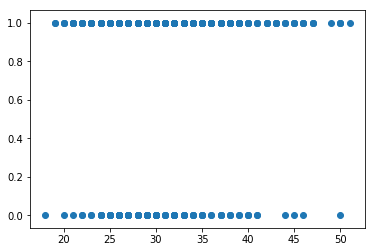

In [11]:
plt.scatter(df['age'],df['paid'])

(array([ 14.,  41., 104., 133.,  75.,  59.,  42.,  13.,  13.,   6.]),
 array([18. , 21.3, 24.6, 27.9, 31.2, 34.5, 37.8, 41.1, 44.4, 47.7, 51. ]),
 <a list of 10 Patch objects>)

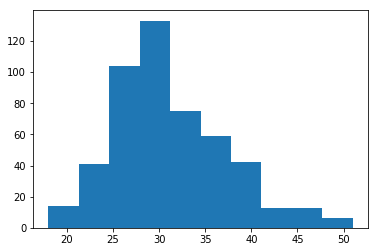

In [12]:
plt.hist(df['age'])

In [13]:
label_encoder = preprocessing.LabelEncoder()
df['loan_status']= label_encoder.fit_transform(df['loan_status']) 

In [14]:
df['loan_status'].unique()

array([2, 0, 1], dtype=int64)

In [15]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,paid
0,xqd20166231,2,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male,1
1,xqd20168902,2,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female,1
2,xqd20160003,2,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female,1
3,xqd20160004,2,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male,1
4,xqd20160005,2,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female,1


In [16]:
df.drop(['Loan_ID','effective_date','due_date','paid_off_time'],axis = 1 ,inplace=True)

In [17]:
df.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender,paid
0,2,1000,30,NaN,45,High School or Below,male,1
1,2,1000,30,NaN,50,Bechalor,female,1
2,2,1000,30,NaN,33,Bechalor,female,1
3,2,1000,15,NaN,27,college,male,1
4,2,1000,30,NaN,28,college,female,1


In [18]:
df['past_due_days'].fillna(0,inplace = True)

In [19]:
df.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender,paid
0,2,1000,30,0.0,45,High School or Below,male,1
1,2,1000,30,0.0,50,Bechalor,female,1
2,2,1000,30,0.0,33,Bechalor,female,1
3,2,1000,15,0.0,27,college,male,1
4,2,1000,30,0.0,28,college,female,1


In [20]:
df['education'].fillna('uneducated',inplace =True )

In [21]:
df['education']= label_encoder.fit_transform(df['education']) 

In [22]:
df.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender,paid
0,2,1000,30,0.0,45,1,male,1
1,2,1000,30,0.0,50,0,female,1
2,2,1000,30,0.0,33,0,female,1
3,2,1000,15,0.0,27,3,male,1
4,2,1000,30,0.0,28,3,female,1


In [23]:
df['Gender']= label_encoder.fit_transform(df['Gender']) 

In [24]:
df.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender,paid
0,2,1000,30,0.0,45,1,1,1
1,2,1000,30,0.0,50,0,0,1
2,2,1000,30,0.0,33,0,0,1
3,2,1000,15,0.0,27,3,1,1
4,2,1000,30,0.0,28,3,0,1


In [25]:
df['paid'].unique()

array([1, 0], dtype=uint64)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_x,test_x,train_y,test_y =  train_test_split(df.iloc[:,:7],df.iloc[:,7:],test_size = 0.2,random_state = 10)

# KNN algorithm

In [28]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_x,train_y)

C:\Users\Roshan.FIREBALL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [29]:
y_hat = classifier.predict(test_x)

In [30]:
y_hat

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=uint8)

In [31]:
jaccard_similarity_score(test_y,y_hat)

0.98

In [32]:
f1_score(test_y,y_hat)

0.988235294117647

In [33]:
log_loss(test_y,y_hat)

0.6907915198468184

# Decision tree

In [34]:
df.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender,paid
0,2,1000,30,0.0,45,1,1,1
1,2,1000,30,0.0,50,0,0,1
2,2,1000,30,0.0,33,0,0,1
3,2,1000,15,0.0,27,3,1,1
4,2,1000,30,0.0,28,3,0,1


In [35]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth = 4)

In [36]:
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
tree.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
y_hat1 = tree.predict(test_x)

In [39]:
y_hat1

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=uint8)

In [40]:
jaccard_similarity_score(test_y,y_hat1)

1.0

In [41]:
f1_score(test_y,y_hat1)

1.0

In [42]:
log_loss(test_y,y_hat1)

9.992007221626413e-16

# Support Vector Machine

In [43]:
classification = svm.SVC()

In [44]:
classification.fit(train_x,train_y)

C:\Users\Roshan.FIREBALL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Roshan.FIREBALL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [45]:
y_hat2 = classification.predict(test_x)

In [46]:
y_hat2

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=uint8)

In [47]:
jaccard_similarity_score(test_y,y_hat2)

0.96

In [48]:
f1_score(test_y,y_hat2)

0.9767441860465117

In [49]:
log_loss(test_y,y_hat2)

1.381583039693636

# Logistic Regression

In [50]:
reg = linear_model.LogisticRegression()

In [51]:
reg.fit(train_x,train_y)

C:\Users\Roshan.FIREBALL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Roshan.FIREBALL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
y_hat3 = reg.predict(test_x)

In [53]:
y_hat3

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=uint8)

In [54]:
jaccard_similarity_score(test_y,y_hat3)

1.0

In [55]:
f1_score(test_y,y_hat3)

1.0

In [56]:
log_loss(test_y,y_hat3)

9.992007221626413e-16